# **Homework 10 - LSTM**
# KDD Tuesdays 12:30 PM - 2:45 PM
## Jake Brulato

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from sklearn.preprocessing import MinMaxScaler

In [126]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()
dataset_train['Close'] = dataset_train['Close'].str.replace(',', '').astype(float)
dataset_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   object 
dtypes: float64(4), object(2)
memory usage: 59.1+ KB


In [127]:
training_set = dataset_train.iloc[:, 4:5].values
print(training_set)
print(training_set.shape)

[[663.59]
 [666.45]
 [657.21]
 ...
 [785.05]
 [782.79]
 [771.82]]
(1258, 1)


In [128]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [129]:
X_train = []
Y_train = []
for i in range(45, 1258):
    X_train.append(training_set_scaled[i-45:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [130]:
print(X_train.shape)
print(Y_train.shape)

(1213, 45)
(1213,)


In [131]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(1213, 45, 1)


In [132]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [133]:
model = Sequential()

# First LSTM layer with dropout
model.add(LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))

# Second LSTM layer with dropout
model.add(LSTM(units=30, return_sequences=True))
model.add(Dropout(0.1))

# Third LSTM layer with dropout
model.add(LSTM(units=30))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [134]:
model.fit(X_train, Y_train, batch_size=32, epochs=100)


Epoch 1/100


38/38 [==============================] - 8s 34ms/step - loss: 0.0268
Epoch 2/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0092
Epoch 3/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0074
Epoch 4/100
38/38 [==============================] - 1s 34ms/step - loss: 0.0061
Epoch 5/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 1s 32ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 1s 34ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0033
Epoch 12/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0041
Epoch 13/100
38/38 [=================

In [135]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
actual_stock_price = dataset_test.iloc[:, 4:5].values

In [136]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 45:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(45, len(inputs)):
    X_test.append(inputs[i-45:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [137]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
for i in range(20):
    print(predicted_stock_price[i])


1/1 [==============================] - 1s 1s/step
[781.74176]
[781.98883]
[785.2931]
[790.8674]
[799.50995]
[806.2237]
[808.394]
[808.8016]
[807.8475]
[807.2871]
[805.9976]
[805.5188]
[804.2988]
[804.4035]
[810.5889]
[818.8022]
[828.88525]
[834.21985]
[831.52094]
[818.41766]


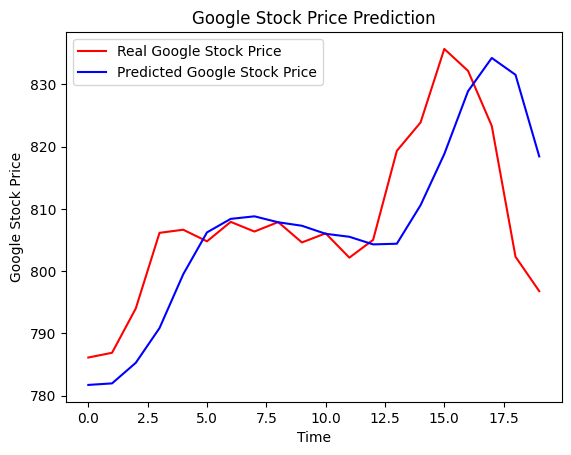

In [138]:
plt.plot(actual_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()